In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from timeit import timeit
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from joblib import dump, load
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from compiledataset import load_dataset, compile_dataset

PATH = "/home/hampus/miun/master_thesis/Datasets"

datasets = {}

# dataset: pd.DataFrame = load_dataset(PATH + "/ORNL", "data_a.csv")
# dataset["remarks"] = "No DLC available"
# datasets["ROAD"] = dataset.to_dict("records")

dataset: pd.DataFrame = load_dataset(PATH + "/Survival", "data.csv") #, "Malfunction_dataset_SONATA")
dataset["remarks"] = "-"
datasets["Survival"] = dataset.to_dict("records")

# dataset: pd.DataFrame = load_dataset(PATH + "/Hisingen", "data.csv", "Vehicle_F-Model_2-Fabrication_attack-Sample_1")
# dataset["remarks"] = "-"
# datasets["Hisingen"] = dataset.to_dict("records")


df = compile_dataset(datasets)
# df.to_csv("../../../Datasets/Survival/data/test_data.csv", index=False)

df.drop(columns=["data", "data_dec", "ID", "DLC", "t"], inplace=True, errors="ignore")
df.drop(columns=["d0", "d1", "d2", "d3", "d4", "d5", "d6", "d7"], inplace=True, errors="ignore")

dataset = None # Release memory, as it isn't used for now
datasets = None

display(df)

,dcs,dcs_ID,dt,dt_ID,dt_data,name,class,dataset,type,Label
0,0.369422,0.078324,0.000444,0.009978,0.724212,Fuzzy_dataset_SONATA,Sonata,Survival,fuzz,0
1,0.453125,0.025104,0.000232,0.009977,0.045600,Fuzzy_dataset_SONATA,Sonata,Survival,fuzz,0
2,0.343750,0.000896,0.000248,0.009981,0.009991,Fuzzy_dataset_SONATA,Sonata,Survival,fuzz,0
3,0.328125,0.008395,0.000234,0.009978,0.047617,Fuzzy_dataset_SONATA,Sonata,Survival,fuzz,0
4,0.375000,0.038187,0.000241,0.009978,0.036785,Fuzzy_dataset_SONATA,Sonata,Survival,fuzz,0
...,...,...,...,...,...,...,...,...,...,...
1735835,0.187500,0.000000,0.000248,0.020620,0.020620,FreeDrivingData_20171231_Spark,Spark,Survival,none,0
1735836,0.265625,0.000000,0.000235,0.013305,0.013305,FreeDrivingData_20171231_Spark,Spark,Survival,none,0
1735837,0.312500,0.000000,0.000242,0.013092,0.013092,FreeDrivingData_20171231_Spark,Spark,Survival,none,0
1735838,0.265625,0.000000,0.000435,0.012329,0.012329,FreeDrivingData_20171231_Spark,Spark,Survival,none,0


In [3]:
df["dt_data"].max()

98.71872806549072

In [4]:
# col = "dcs_ID"
# v_r         = df.loc[(df["Label"] == 0) & (df["class"] == "modelF"), col]
# v_sonata    = df.loc[(df["Label"] == 0) & (df["class"] == "Sonata"), col]
# v_soul      = df.loc[(df["Label"] == 0) & (df["class"] == "Soul"), col]
# v_spark     = df.loc[(df["Label"] == 0) & (df["class"] == "Spark"), col]

# print(v_r.mean(), v_r.std())
# print(v_sonata.mean(), v_sonata.std())
# print(v_soul.mean(), v_soul.std())
# print(v_spark.mean(), v_spark.std())

In [5]:
# from load_signal_road import load_signal_road
# df = load_signal_road()
# df.drop(columns=["ID", "t"], inplace=True)
# df.fillna(-100000, inplace=True)
# display(df)

# X_train = df.drop(columns=["Label"])
# y_train = df["Label"]
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)

In [6]:
# rus = RandomUnderSampler(random_state=0)
# X_train, y_train = rus.fit_resample(X_train, y_train)
# X_test, y_test = rus.fit_resample(X_test, y_test)
# bintr = np.bincount(y_train)
# binte = np.bincount(y_test)
# print(f"Labels\t\tTraining\tTesting\nNormal\t\t{bintr[0]}\t\t{binte[0]}\nAttack\t\t{bintr[1]}\t\t{binte[1]}")

In [7]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=20, random_state=0, max_leaf_nodes=300, max_features="log2", warm_start=True)
# clf.fit(X_train, y_train)

In [8]:
# scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)
# print("Training F1: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

# pred = clf.predict(X_test)

# f1_scores = f1_score(y_test, pred, average='weighted')
# print("Testing F1:  %0.4f(+/- %0.4f)" % (f1_scores.mean(), f1_scores.std()))

# kappa_scores = cohen_kappa_score(y_test, pred)
# print("Kappa score:  %0.4f(+/- %0.4f)" % (kappa_scores.mean(), kappa_scores.std()))

In [9]:
# from plot_tools import plot_confusion_matrix

# pred_train = clf.predict(X_train)

# plot_confusion_matrix(y_train, pred_train, "Survival, All Attacks, RF\nrate\n(# of instances)")

In [10]:
# import shap
# exp = shap.TreeExplainer(clf, data=X_train, model_output="probability")

# from shap_tools import *
# shap_all = get_explanation(exp, X_train, 600)

# plot_beeswarm(shap_all)

Test Above ^^^

In [11]:
df = df.loc[df["type"] != "masq"]
# df = df.loc[(df["type"] == "fuzz") | (df["type"] == "none")]

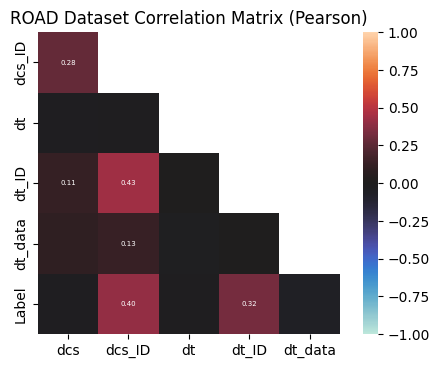

In [12]:
from plot_tools import plot_correlation_matrix

plot_correlation_matrix(df.drop(columns=["dataset", "type", "name", "class" "ID", "DLC", "t"], errors="ignore"))

In [13]:
# from sklearn.preprocessing import StandardScaler, RobustScaler

# feature_columns= list(set(df.columns.to_list()).difference(["name", "class", "dataset", "type", "Label"]))

# for col in feature_columns:
#     scaler = StandardScaler().fit(df.loc[df["Label"] == 0, df.columns == col])
#     df.loc[:, df.columns == col] = scaler.transform(df.loc[:, df.columns == col])

# display(df)

In [14]:
# Stratify on the sub-dataset
X_train = df.drop(columns="Label")
y_train = df["Label"]

df = None # Release memory

# Split dataset into training and test data, stratify by the type of attack
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=X_train["name"])

In [15]:
# X_train = df.loc[df["type"] != "normal"]
# y_train = X_train["Label"]
# X_train = X_train.drop(columns="Label")

# X_test = df.loc[df["type"] == "normal"]
# y_test = X_test["Label"]
# X_test = X_test.drop(columns="Label")

In [16]:
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_test, y_test = rus.fit_resample(X_test, y_test)
bintr = np.bincount(y_train)
binte = np.bincount(y_test)
print(f"Labels\t\tTraining\tTesting\nNormal\t\t{bintr[0]}\t\t{binte[0]}\nAttack\t\t{bintr[1]}\t\t{binte[1]}")

Labels		Training	Testing
Normal		128216		55098
Attack		128216		55098


In [17]:
# train_index = X_train.loc[X_train["dataset"] == "Survival"].index
# test_index = X_test.loc[X_test["dataset"] == "ROAD"].index
# train_index = X_train.loc[(X_train["dataset"] == "Survival") & (X_train["name"] == "Fuzzy_dataset_SONATA")].index
# test_index = X_test.loc[(X_test["dataset"] == "ROAD") & (X_test["name"] == "fuzzing_attack_1")].index

# X_train = X_train.loc[train_index]
# y_train = y_train.loc[train_index]

# X_test = X_test.loc[test_index]
# y_test = y_test.loc[test_index]

In [18]:
name_train = X_train["name"]
# name_test = X_test["name"]
X_train.drop(columns=["type", "dataset", "name", "class"], inplace=True)
X_test.drop(columns=["type", "dataset", "name", "class"], inplace=True)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, random_state=0, max_leaf_nodes=300, max_features="log2", warm_start=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_leaf_nodes=300, n_estimators=20,
                       random_state=0, warm_start=True)

In [20]:
# pred_train = clf.predict(X_train)
# clf.set_params(n_estimators=(20+13)) # Add another tree for the FN and FPs
# clf.fit(X_train.loc[y_train != pred_train], y_train.loc[y_train != pred_train])

In [21]:
f1_scores_train = cross_val_score(clf, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)
print("Training F1: %0.4f (+/- %0.4f)" % (f1_scores_train.mean(), f1_scores_train.std()))

# f1_scores_test = f1_score(y_test, pred, average='weighted')
f1_scores_test = cross_val_score(clf, X_test, y_test, scoring='f1', cv=10, n_jobs=-1)
print("Testing F1:  %0.4f (+/- %0.4f)" % (f1_scores_test.mean(), f1_scores_test.std()))

pred = clf.predict(X_test)

kappa_scores = cohen_kappa_score(y_test, pred)
# kappa_scores = cross_val_score(clf, X_test, y_test, scoring='kappa', cv=10, n_jobs=-1)
print("Kappa score:  %0.4f" % (kappa_scores.mean()))

Training F1: 0.9994 (+/- 0.0002)
Testing F1:  0.9993 (+/- 0.0002)
Kappa score:  0.9989


Plot train then test data predictions

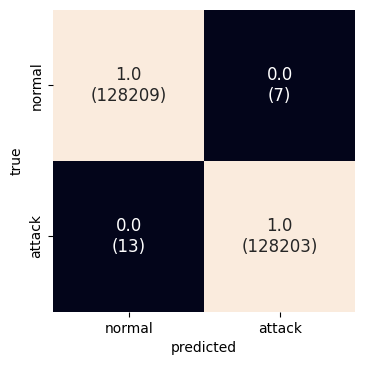

In [22]:
from plot_tools import plot_confusion_matrix

pred_train = clf.predict(X_train)

plot_confusion_matrix(y_train, pred_train, "RF, \"Survival\", all attacks, training data\n(# of instances)", cbar=False)

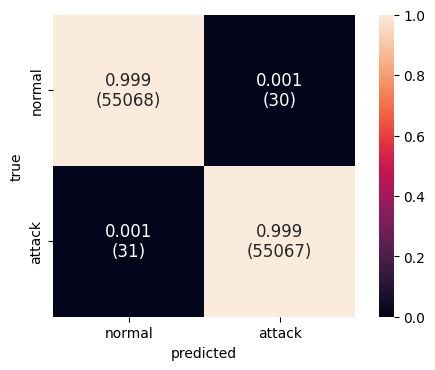

In [23]:
plot_confusion_matrix(y_test, pred, "RF, \"Survival\", all attacks, testing data\n(# of instances)")

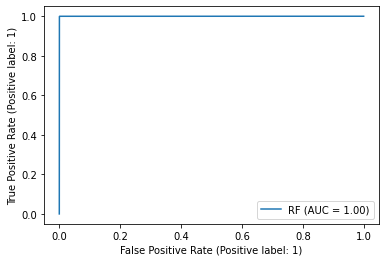

In [24]:
from sklearn.metrics import RocCurveDisplay

# RocCurveDisplay.from_predictions(y_test, pred, name="RF")
RocCurveDisplay.from_estimator(clf, X_test, y_test, name="RF")

In [25]:
import shap

exp = shap.TreeExplainer(clf, data=X_train, model_output="probability")
# exp = shap.KernelExplainer(clf.predict_proba, data=X_train.sample(100, random_state=1))
print(exp.expected_value)

[0.49947905 0.50052095]


In [26]:
from shap_tools import *


# Make sure that the ingested SHAP model (a TreeEnsemble object) makes the
# same predictions as the original model
# assert np.abs(exp.model.predict(X_train) - clf.predict_proba(X_train)).max() < 1e-4

X_train_exp = X_train.sample(min(len(X_train), 600), random_state=0)
y_train_exp = y_train[X_train_exp.index]

shap_all = get_explanation(exp, X_train_exp)

# dump(shap_all, "rf_survival_all_shap")

# # Make sure the SHAP values sum up to the model output (this is the local accuracy property)
# assert np.abs((shap_all.base_values + shap_all.values).sum(1) - clf.predict_proba(X_train)).max() < 1e-4

# print(len(X_train.loc[y_train != pred]))
# print(len(X_train.loc[y_train == pred]))
# shap_false = get_explanation(exp, X_train.loc[y_train != pred])
# shap_FP = get_explanation(exp, X_train.loc[(y_train != pred) & (pred == 1)])
# shap_FN = get_explanation(exp, X_train.loc[(y_train != pred) & (pred == 0)])
# shap_true = get_explanation(exp, X_train.loc[y_train == pred])
# shap_TP = get_explanation(exp, X_train.loc[(y_train == pred) & (pred == 1)])
# shap_TN = get_explanation(exp, X_train.loc[(y_train == pred) & (pred == 0)])

# shap_TP_fuzz = get_explanation(exp, X_test.loc[(y_train == pred) & (pred == 1) & (name_test == "Fuzzy_dataset_SONATA")])

['rf_survival_all_shap']

In [38]:
display(shap_all[:1,"dt_ID"])

.values =
array([-0.32969622])

.base_values =
array([0.50052095])

.data =
array([0.01798105])

In [39]:
X_test_sample = X_test.sample(10, random_state=7)
y_test_sample = y_test.loc[X_test_sample.index]
pred_sample = pred[X_test_sample.index]
print(X_test_sample)
print(y_test_sample)
print(pred_sample)

             dcs    dcs_ID        dt      dt_ID   dt_data
98980   0.437500  0.562500  0.000219   1.156592  1.817189
100891  0.125000  0.000000  0.000511   0.000680  0.000680
936     0.000000  0.000000  0.000248   0.020592  0.000248
56917   0.531250  0.500000  0.000472   0.928174  1.013259
46792   0.406250  0.046875  0.001744   0.010083  0.739328
4262    0.312500  0.000000  0.000348   0.099998  0.099998
102433  0.406250  0.453125  0.000355  15.445280  1.817189
106770  0.406250  0.500000  0.000225   8.632301  1.013259
35302   0.468750  0.187500  0.000243   0.008762  6.718745
86721   0.453125  0.437500  0.000218   0.606403  1.817189
98980     1
100891    1
936       0
56917     1
46792     0
4262      0
102433    1
106770    1
35302     0
86721     1
Name: Label, dtype: int64
[1 1 0 1 0 0 1 1 0 1]


In [49]:
# plot_beeswarm(shap_all)
def plot_beeswarm2(exp_obj):
    vis = shap.plots.beeswarm(exp_obj, show=False, max_display=20 , color=plt.get_cmap("plasma"), order=exp_obj.feature_names)
    plt.gcf().axes[-1].set_aspect(100)
    plt.gcf().axes[-1].set_box_aspect(100)
    return vis

shap_all.feature_names = ["A", "B", "C", "D", "E"]
plot_beeswarm2(shap_all)

TypeError: list indices must be integers or slices, not str

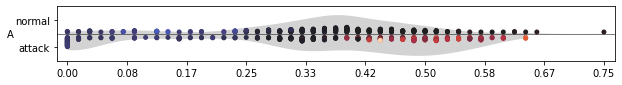

5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


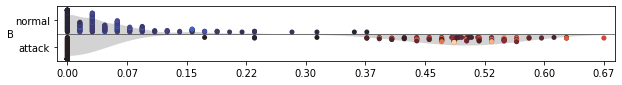

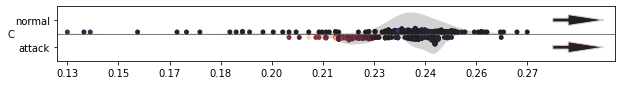

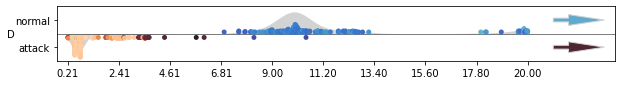

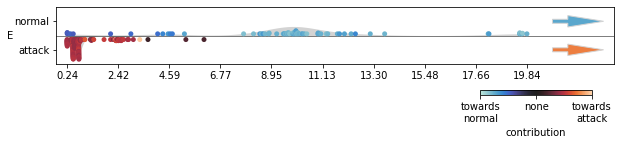

In [48]:
import matplotlib
def plot_test(df_exp: pd.DataFrame, shap_all: shap.Explanation, feature, trim=None, y_squish=10, scale=1, colorbar=False, y_size=1):
    df_exp["Label"].replace({0: "normal", 1: "attack"}, inplace=True)
    shap_exp = shap_all.values[:,df_exp.columns.get_loc(feature)]

    mask = None
    if trim == None:
        mask = (np.abs(stats.zscore(df_exp[feature])) < 3)
    else:
        mask = (df_exp[feature] > trim[0]) & (df_exp[feature] < trim[1])

    attack_outliers = shap_exp[~mask & (df_exp["Label"] == "attack")]
    normal_outliers = shap_exp[~mask & (df_exp["Label"] == "normal")]

    shap_exp = shap_exp[mask]
    df_exp = df_exp[mask]

    # plt.figure(figsize=(20, 2), dpi=100)
    # plt.figure(80, y_squish)
    # fig = plt.figure() 
    # ax = fig.add_axes([0, 0, 80, y_squish])
    fig, ax = plt.subplots(figsize=(80, y_squish))
    
    cmap_name = "icefire"
    violin_color = "lightgray"

    scaler = max(abs(shap_exp.min()), abs(shap_exp.max()))
    shap_hues = shap_exp / scaler
    shap_hues = (shap_hues + 1) * shap_all.base_values[0]

    if attack_outliers.size != 0:
        attack_outliers /= max(abs(attack_outliers.min()), abs(attack_outliers.max()))
        attack_outliers = (attack_outliers + 1) * shap_all.base_values[0]

    if normal_outliers.size != 0:
        normal_outliers /= max(abs(normal_outliers.min()), abs(normal_outliers.max()))
        normal_outliers = (normal_outliers + 1) * shap_all.base_values[0]
    
    cmap = sns.color_palette(cmap_name, as_cmap=True)
    norm = plt.Normalize(vmin=0, vmax=1)
    palette = {h: cmap(h) for h in shap_hues}

    values = df_exp[feature]
    feature_min = values.min()
    feature_max = values.max()
    values = (values - values.min()) / (values.max() - values.min())
    label = df_exp["Label"]

    sns.swarmplot(x=values, y=label, order=["normal", "attack"],
        hue=shap_hues, orient="h", palette=palette,
        size=5)
    
    # Change offset on dots for normal (0)
    offsets = ax.collections[0].get_offsets()
    offsets = [[elem[0], -abs(elem[1] - 0) - 0.03] for elem in offsets]
    ax.collections[0].set_offsets(offsets)

    # Change offset on dots for attack (1)
    offsets = ax.collections[1].get_offsets()
    offsets = [[elem[0], abs(elem[1] - 1) + 0.07] for elem in offsets]
    ax.collections[1].set_offsets(offsets)

    fig.set_size_inches(10, y_size)

    sns.violinplot(x=values, y=[0]*label.size, hue=label, split=True, hue_order=["normal", "attack"],
        orient="h",  showfliers=False, scale="count", bw=0.2, gridsize=1000, linewidth=0, color=violin_color,
        cut=0, inner=None)
    
    for violin in ax.findobj(matplotlib.collections.PolyCollection):
        violin.set_facecolor("lightgray")
    
    ax.legend_.remove()

    if colorbar:
        cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_name), label="contribution", location="bottom", shrink=0.2, anchor=(0.95, -1))
        cbar.set_ticks([0, 0.5, 1])
        cbar.set_ticklabels(["towards\nnormal", "none", "towards\nattack"])

    f_dict = {"dcs": "A", "dcs_ID": "B", "dt": "C", "dt_ID": "D", "dt_data": "E"}
    feature = f_dict[feature]
    # ax.set_title(f"How the RF-model classifies data - feature: {feature}")
    # ax.set_title(feature)
    # feature = feature + " (ms)" if feature[0:2] == "dt" else feature

    # ax.set_ylabel("type of data")
    ax.set_ylabel(feature, rotation="horizontal", x=-1, y=0.4)
    # ax.set_xlabel(f"value of {feature}")
    ax.set_xlabel("")

    ax.set_xticks(ticks=np.linspace(0, 1, 10), labels=map(lambda x: format(x*scale, '.2f'), np.linspace(feature_min, feature_max, 10)))
    ax.set_yticks(ticks=[-0.25, 0.25], labels=["normal", "attack"])
    ax.axhline(y=0, color="black", linewidth=0.5)
    
    s_last = ax.get_xticks()[-2]
    last = ax.get_xticks()[-1]
    
    if normal_outliers.size != 0:
        ax.arrow(last + (last-s_last) * 0.5, -0.25, last-s_last, 0, facecolor=cmap(normal_outliers.mean()), edgecolor=violin_color,
            width=0.07, head_length=(last-s_last)*0.7, head_width=0.2,
            length_includes_head=True)
    if attack_outliers.size != 0:
        ax.arrow(last + (last-s_last) * 0.5, 0.25, last-s_last, 0, facecolor=cmap(attack_outliers.mean()), edgecolor=violin_color,
            width=0.07, head_length=(last-s_last)*0.7, head_width=0.2,
            length_includes_head=True)
    
    ax.margins(x=0.02)

    # return ax
    plt.show()

plot_test(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dcs", trim=(-1, 1), y_squish=25)
plot_test(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dcs_ID", trim=(-1, 1), y_squish=15)
plot_test(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dt", trim=(0, 0.0003), scale=1000, y_squish=20)
plot_test(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dt_ID", trim=(0, 0.02), scale=1000)
plot_test(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dt_data", trim=(0, 0.02), scale=1000, colorbar=True, y_size=1.5)

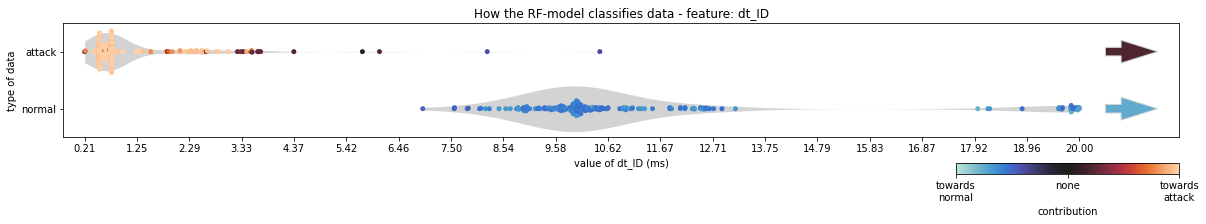

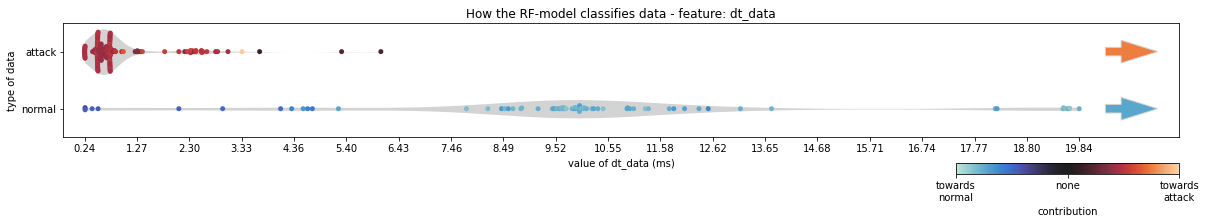

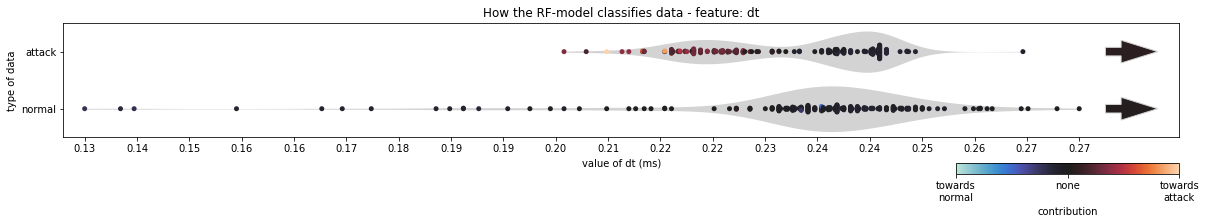

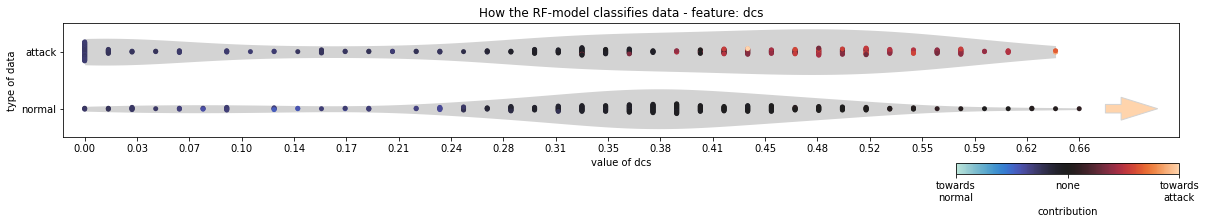

7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


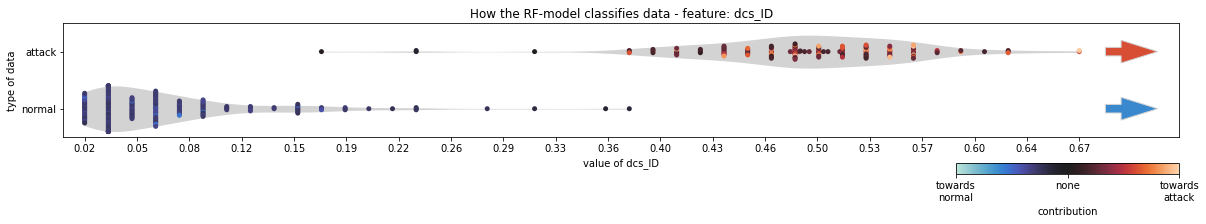

In [28]:
plot_exp(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dt_ID", trim=(0, 0.02), scale=1000)
plot_exp(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dt_data", trim=(0, 0.02), scale=1000)
plot_exp(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dt", trim=(0, 0.0003), scale=1000, y_squish=20)
plot_exp(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dcs", trim=(-1, 0.7), y_squish=25)
plot_exp(pd.concat([X_train_exp, y_train_exp], axis=1), shap_all, "dcs_ID", trim=(0, 0.8), y_squish=10)


In [29]:
# shap_TP_fuzz = get_explanation(exp, X_train.loc[(y_train == pred_train) & (pred_train == 1) & (name_train == "Fuzzy_dataset_SONATA")])
# plot_waterfall(shap_TP_fuzz, 0)

In [30]:
plot_force(shap_all[65])

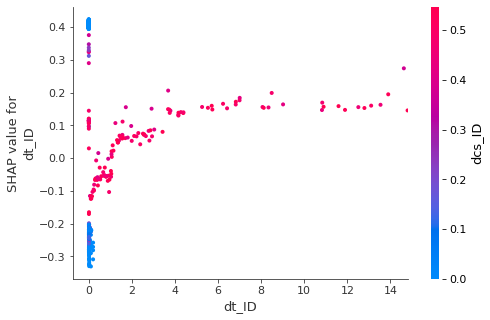

In [31]:
plot_dependence(shap_all, "dt_ID", "dcs_ID", xmax="percentile(99)")

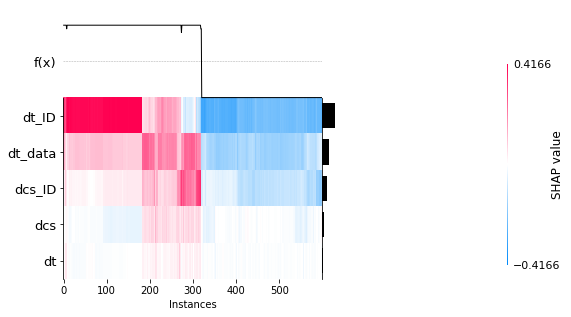

In [32]:
plot_heatmap(shap_all)

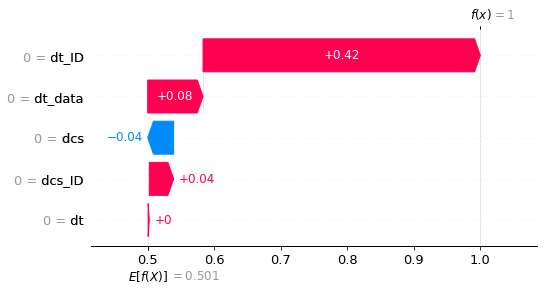

In [33]:
# display(pd.Series(shap_all.data[4], index=shap_all.feature_names))
plot_waterfall(shap_all, 4)

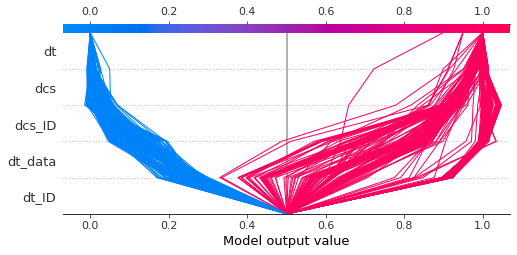

In [34]:
r = shap.decision_plot(shap_all.base_values[1],
    shap_all.values,
    pd.DataFrame(shap_all.data, columns=shap_all.feature_names),
    feature_order='hclust',
    return_objects=True
)

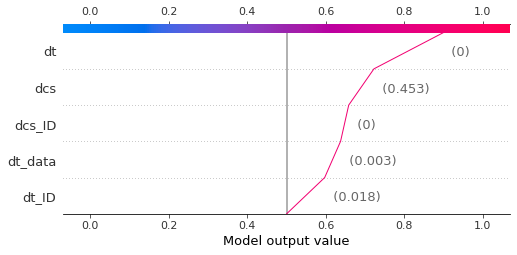

In [35]:
idx = np.argpartition(shap_all.values[:, pd.DataFrame(shap_all.data, columns=shap_all.feature_names).columns.get_loc('dt')], -2)[-1]
shap.decision_plot(shap_all.base_values[1],
    shap_all.values[idx],
    pd.DataFrame(shap_all.data, columns=shap_all.feature_names),
    feature_order=r.feature_idx,
    xlim=r.xlim
)

In [29]:
plot_force(shap_all)

In [37]:
# feature1 = "dcs_ID"
# idx = shap_all.feature_names.index(feature1)
# shap_sums = np.sum(shap_all.values, axis=1)
# rule1 = X_train.sample(600, random_state=0)[(shap_sums > 0) & (shap_all.values[:,idx] > 0)][feature1].min()
# rule1

In [38]:
# feature2 = "dt_ID"
# idx = shap_all.feature_names.index(feature1)
# shap_sums = np.sum(shap_all.values, axis=1)
# rule2 = X_train.sample(600, random_state=0)[(shap_sums > 0) & (shap_all.values[:,idx] < 0)][feature1].max()
# rule2 = 1

In [39]:
# def rule_predictor(X: pd.DataFrame, y: pd.DataFrame):
#     mask = (X[feature1] >= rule1) | (X[feature2] >= rule2)
#     pred_out = y.copy() * 0
#     pred_out.loc[mask] = 1
#     # for i, row in X.iterrows():
#     return pred_out

# preddy = rule_predictor(X_test, y_test)

# plot_confusion_matrix(y_test, preddy, "Rule classification")

# zeros = np.bincount(y_test.loc[mask])[0]
# ones = np.bincount(y_test.loc[mask])[1]
# # print(zeros)
# print(1 - zeros/ones)

In [40]:
# from sklearn.metrics import confusion_matrix
# pred_train = clf.predict(X_train)
# cm = confusion_matrix(y_train, pred_train)

# result = [[cm[0][1]], [cm[1][0]]]

# for i in range(1, 31):
#     clf.set_params(n_estimators=(20+i)) # Add another tree for the FN and FPs
#     clf.fit(X_train.loc[y_train != pred_train], y_train.loc[y_train != pred_train]) # 1 for FP, 0 for FN
#     pred_train = clf.predict(X_train)
#     cm = confusion_matrix(y_train, pred_train)
#     result[0].append(cm[0][1])
#     result[1].append(cm[1][0])

# print(result[0])
# print(result[1])

In [41]:
# plt.plot(result[0], label="FP")
# plt.plot(result[1], label="FN")
# plt.title("Change in FP and FN predictions\nwith more trees trained on FP and FN instances")
# plt.xlabel("Number of additional trees (originally 20)")
# plt.ylabel("Number of instances")
# plt.legend()
# plt.show